**Problem Statement:-
 A global financial company wants to develop an intelligent system employing data science and machine learning to automate the categorization of individuals into specific credit score brackets. Firstly, it seeks to alleviate the manual effort involved in credit assessment, optimizing operational processes. Secondly, it aims to enable more tailored financial services by precisely classifying customers based on their creditworthiness**.

**The Goal is to help banks and credit card companies immediately to issue loans to customers with good creditworthiness. There are three credit scores that banks and credit card companies use to label their customers: Good,Standard,Poor . A person with a good credit score will get loans from any bank and financial institution at best.**



In [130]:
#import necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Load the dataset to python environment



In [131]:
data=pd.read_csv('credit.csv')
data.head(15)#displaying  first rows of the dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


In [132]:
data.tail(15)#displaying last rows of the dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99985,155611,34304,2,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,39.772607,69.0,Yes,60.964772,34.662906,Low_spent_Small_value_payments,273.750662,Poor
99986,155612,34304,3,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,24.713861,70.0,Yes,60.964772,34.662906,Low_spent_Small_value_payments,345.743101,Poor
99987,155613,34304,4,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,30.614953,71.0,Yes,60.964772,34.662906,High_spent_Large_value_payments,328.301277,Standard
99988,155614,34304,5,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,28.508250,72.0,Yes,60.964772,34.662906,Low_spent_Small_value_payments,208.047884,Standard
99989,155615,34304,6,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,33.359987,73.0,Yes,60.964772,34.662906,Low_spent_Small_value_payments,307.659291,Standard
99990,155616,34304,7,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,25.123535,74.0,Yes,60.964772,34.662906,Low_spent_Large_value_payments,228.750392,Standard
99991,155617,34304,8,Sarah McBridec,29.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,37.140784,75.0,Yes,60.964772,34.662906,High_spent_Large_value_payments,337.362988,Standard
99992,155622,37932,1,Nicks,24.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,32.991333,375.0,No,35.104023,24.028477,Low_spent_Small_value_payments,189.641080,Poor
99993,155623,37932,2,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,29.135447,376.0,No,35.104023,24.028477,Low_spent_Medium_value_payments,400.104466,Standard
99994,155624,37932,3,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,39.323569,377.0,No,35.104023,24.028477,High_spent_Medium_value_payments,410.256158,Poor


In [133]:
data.columns#display the columns of the dataset

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [134]:
data.shape#displaying the number of rows and columns in the dataset

(100000, 28)

In [135]:
data.dtypes#display the type of columns in the dataset

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [136]:
data.info()#display the basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [137]:
data.isna().sum()#displaying missing values from each feature in the dataset

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

There is no missining values in the given dataset



In [138]:
data.nunique()#displaying the unique value count in each feature

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

##Displaying value count of categorical features

In [139]:
data['Name'].value_counts()

Jessicad              48
Langep                48
Stevex                48
Vaughanl              40
Ronald Groverk        40
                      ..
Breidthardtj           8
Sven Egenterx          8
Antonella Ciancioc     8
Valentina Zan          8
Nicks                  8
Name: Name, Length: 10128, dtype: int64

In [140]:
data['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64

In [141]:
data['Credit_Score'].value_counts()#displaying the value count of target feature

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [142]:
data['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [143]:
data['Occupation'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [144]:
data['Type_of_Loan'].value_counts()

No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday Loan, Mortgag

In [145]:
data['Credit_Mix'].value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

##Exploratory Data Analysis

In [146]:
data.describe()#describe the numerical features

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [147]:
data.describe(include='all')#discribe the statistics of numerical and categorical features

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,100000.000000,100000,100000.000000,1.000000e+05,100000,100000.000000,100000.000000,100000.000000,...,100000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000.000000,100000
unique,NaN,NaN,NaN,10128,NaN,NaN,15,NaN,NaN,NaN,...,3,NaN,NaN,NaN,3,NaN,NaN,6,NaN,3
top,NaN,NaN,NaN,Jessicad,NaN,NaN,Lawyer,NaN,NaN,NaN,...,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,NaN,NaN,NaN,48,NaN,NaN,7096,NaN,NaN,NaN,...,45848,NaN,NaN,NaN,52326,NaN,NaN,28616,NaN,53174
mean,80631.500000,25982.666640,4.500000,NaN,33.316340,5.004617e+08,NaN,50505.123449,4197.270835,5.368820,...,NaN,1426.220376,32.285173,221.220460,NaN,107.699208,55.101315,NaN,392.697586,NaN
std,43301.486619,14340.543051,2.291299,NaN,10.764812,2.908267e+08,NaN,38299.422093,3186.432497,2.593314,...,NaN,1155.129026,5.116875,99.680716,NaN,132.267056,39.006932,NaN,201.652719,NaN
min,5634.000000,1006.000000,1.000000,NaN,14.000000,8.134900e+04,NaN,7005.930000,303.645417,0.000000,...,NaN,0.230000,20.000000,1.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,43132.750000,13664.500000,2.750000,NaN,24.000000,2.451686e+08,NaN,19342.972500,1626.594167,3.000000,...,NaN,566.072500,28.052567,144.000000,NaN,29.268886,27.959111,NaN,267.615983,NaN
50%,80631.500000,25777.000000,4.500000,NaN,33.000000,5.006886e+08,NaN,36999.705000,3095.905000,5.000000,...,NaN,1166.155000,32.305784,219.000000,NaN,66.462304,45.156550,NaN,333.865366,NaN
75%,118130.250000,38385.000000,6.250000,NaN,42.000000,7.560027e+08,NaN,71683.470000,5957.715000,7.000000,...,NaN,1945.962500,36.496663,302.000000,NaN,147.392573,71.295797,NaN,463.215683,NaN


**By analysing the features of the dataset,the dataset has
 1,00,000 Rows and 28 Columns.There are 27 features,both categorical and numerical which are used for prediction and a target feature 'Credit_Score' which is a categorical variable.There are three credit scores that banks and credit card companies use to label their customers: good, standard and poor.from the 27 features, 6 are categorical features and 21 features are numerical variables.By inspecting the statistical summery, there is no missing values and there are some outliers but no need to remove them.**

In [148]:
data[['Age','Occupation','Annual_Income','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Type_of_Loan']]

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan
0,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
1,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
2,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
3,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
4,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,..."
...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan"
99996,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan"
99997,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan"
99998,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,"Auto Loan, and Student Loan"


In [149]:
#converting float to int
data["Age"] = data["Age"].astype(int)
data["Num_of_Loan"] = data["Num_of_Loan"].astype(int)
data["Num_Bank_Accounts"] =data["Num_Bank_Accounts"].astype(int)
data["Credit_History_Age"] = data["Credit_History_Age"].astype(int)
data["Num_Credit_Inquiries"] = data["Num_Credit_Inquiries"].astype(int)
data["Num_Credit_Card"] = data["Num_Credit_Card"].astype(int)
data["Interest_Rate"] = data["Interest_Rate"].astype(int)
data["Delay_from_due_date"] = data["Delay_from_due_date"].astype(int)

In [150]:
data.info()#after convertion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [151]:
data[['Age','Occupation','Annual_Income','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Credit_Score']]

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,Good
1,23,Scientist,19114.12,3,4,3,4,Good
2,23,Scientist,19114.12,3,4,3,4,Good
3,23,Scientist,19114.12,3,4,3,4,Good
4,23,Scientist,19114.12,3,4,3,4,Good
...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,4,6,7,2,Poor
99996,25,Mechanic,39628.99,4,6,7,2,Poor
99997,25,Mechanic,39628.99,4,6,7,2,Poor
99998,25,Mechanic,39628.99,4,6,7,2,Standard


<Axes: title={'center': 'Age'}>

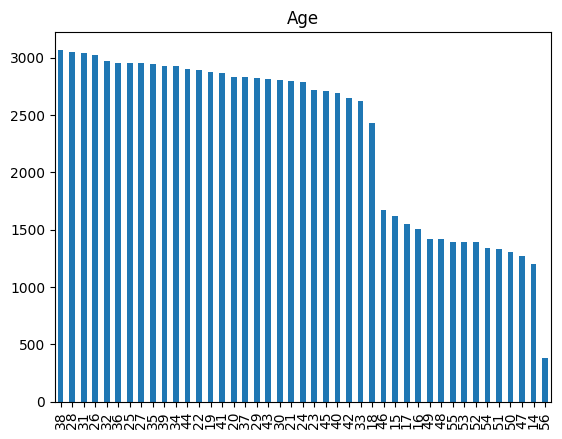

In [152]:
data['Age'].value_counts().plot.bar(title='Age')


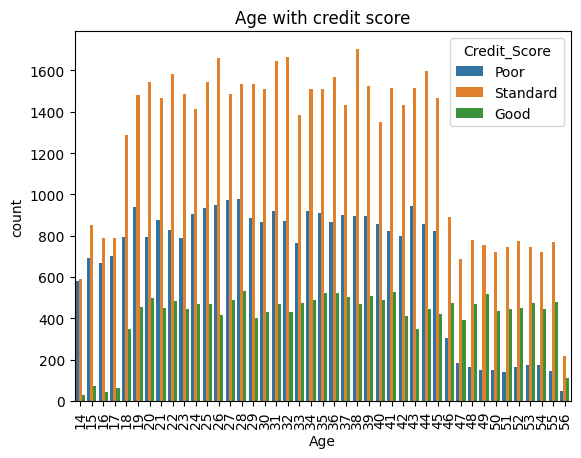

In [192]:
# Explore categorical variables
sns.countplot(data=data,x="Age", hue="Credit_Score")
plt.xticks(x="Age", rotation='vertical')
plt.title('Age with credit score')
plt.show()

**customers from age below 18 has low "good credit score".And customers from age 18 to 55 has high "good cresit score"**

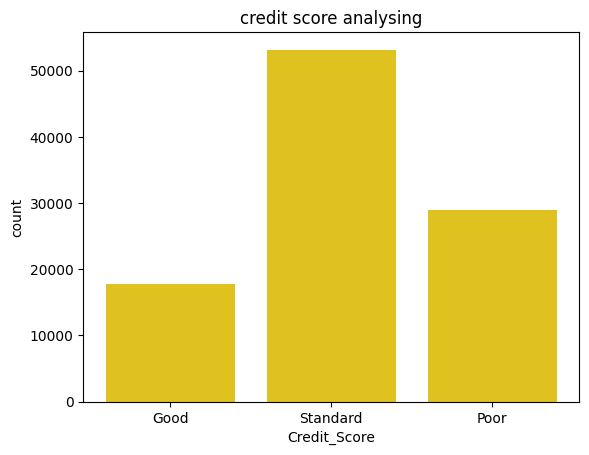

In [153]:
# Visualize the distribution of the target variable
sns.countplot(x='Credit_Score', data=data,color='gold')
plt.plot()
plt.title('credit score analysing')
plt.show()

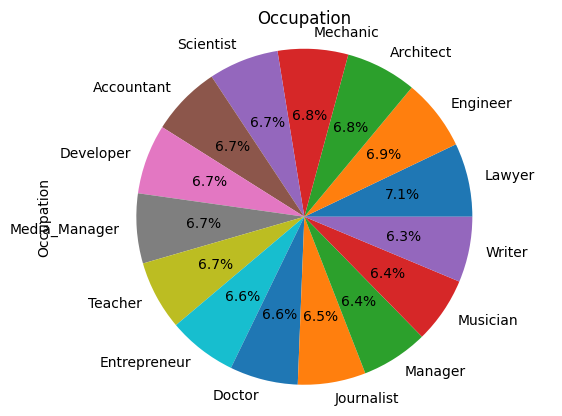

In [154]:
data['Occupation'].value_counts().plot.pie(title='Occupation',autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

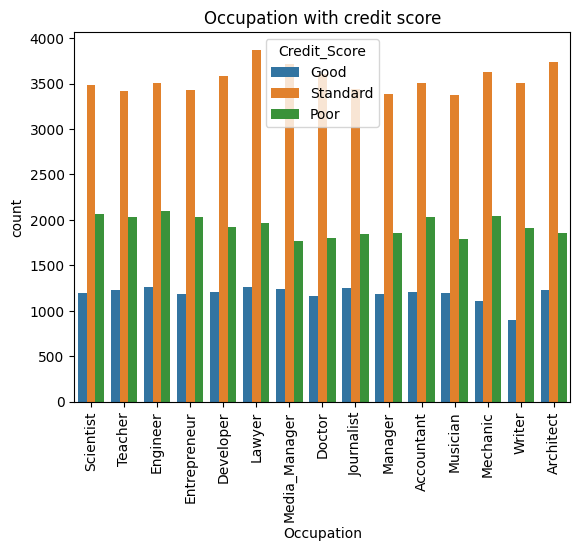

In [193]:
# Explore categorical variables
sns.countplot(data=data,x="Occupation", hue="Credit_Score")
plt.xticks(x="Occupation", rotation='vertical')
plt.title('Occupation with credit score')
plt.show()

**By analysing this graph,the customers from 15 different profession has not much difference in thier credit score**

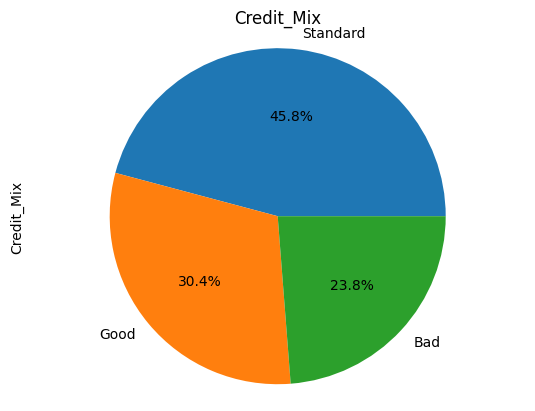

In [156]:
data['Credit_Mix'].value_counts().plot.pie(title='Credit_Mix',autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

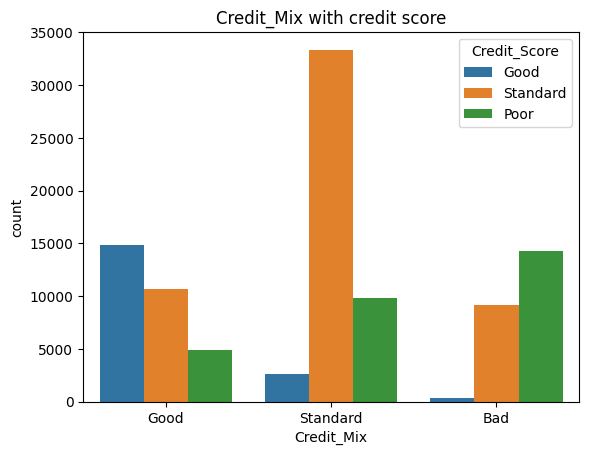

In [157]:
# Explore categorical variables
sns.countplot(data=data,x="Credit_Mix", hue="Credit_Score")
plt.xticks(x="Credit_Mix")
plt.title('Credit_Mix with credit score')
plt.show()

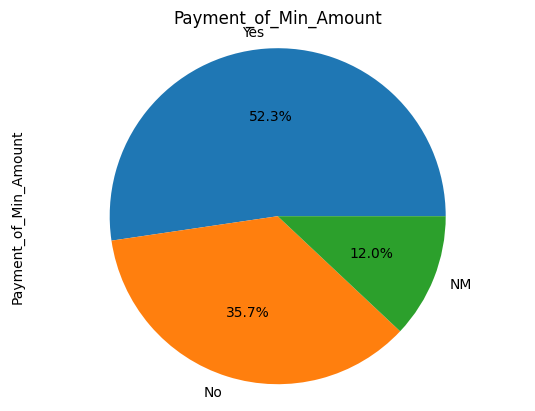

In [158]:
data['Payment_of_Min_Amount'].value_counts().plot.pie(title='Payment_of_Min_Amount',autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

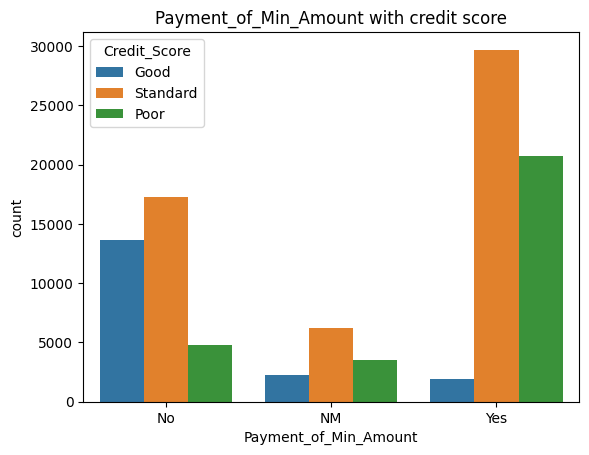

In [159]:
# Explore categorical variables
sns.countplot(data=data,x="Payment_of_Min_Amount", hue="Credit_Score")
plt.xticks(x="Payment_of_Min_Amount")
plt.title('Payment_of_Min_Amount with credit score')
plt.show()

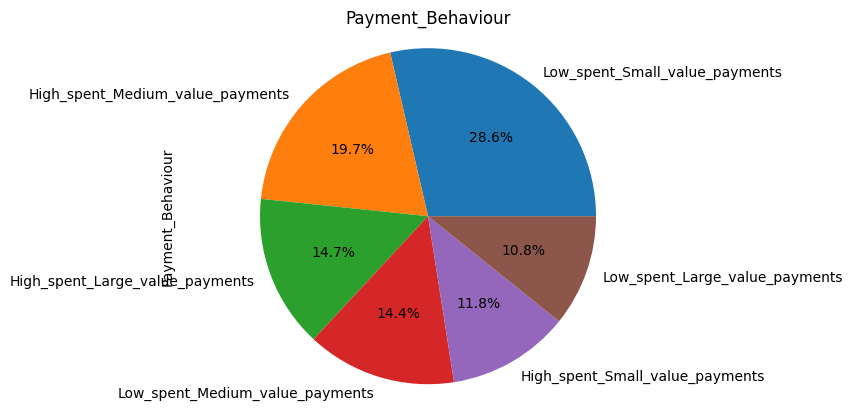

In [160]:
data['Payment_Behaviour'].value_counts().plot.pie(title='Payment_Behaviour',autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

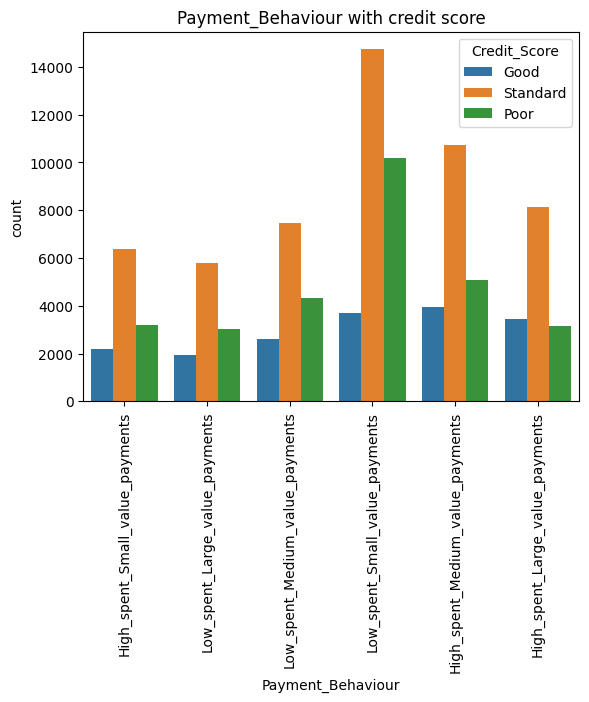

In [161]:
# Explore categorical variables
sns.countplot(data=data,x="Payment_Behaviour", hue="Credit_Score")
plt.xticks(x="Payment_Behaviour", rotation='vertical')
plt.title('Payment_Behaviour with credit score')
plt.show()

**customer who spent on 'low_spent_small_value_payments' have high "standard credit score" and high "poor credit score".High_spent_medium_value_payments have high "good credit score" comparing others.**

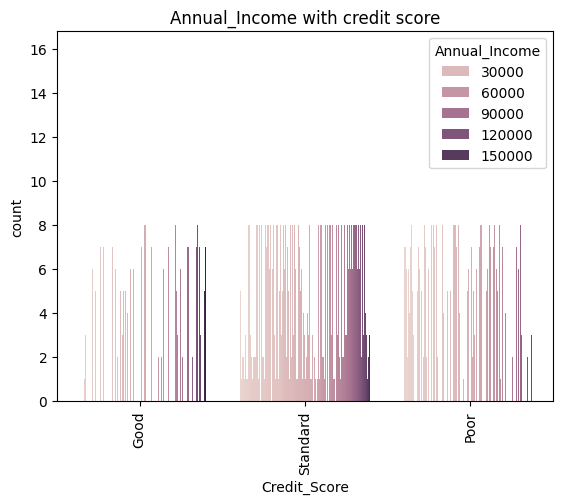

<Figure size 1000x600 with 0 Axes>

In [162]:
sns.countplot(data=data,x="Credit_Score", hue="Annual_Income")
plt.xticks(x="Credit_Score", rotation='vertical')
plt.title('Annual_Income with credit score')
plt.figure(figsize=(10, 6))
plt.show()

**here credit score is depended with high annual income.customer who earns more have good credit score**

<Axes: title={'center': 'Interest_Rate'}>

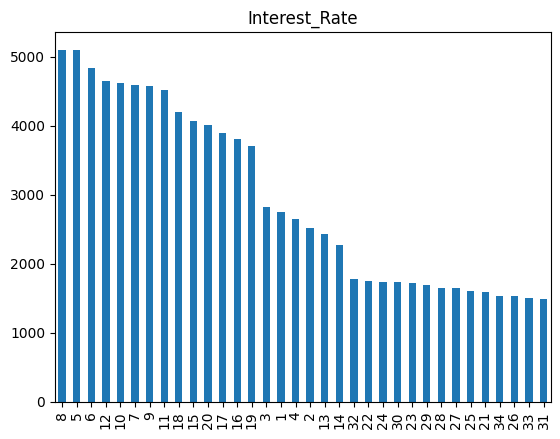

In [163]:
data['Interest_Rate'].value_counts().plot.bar(title='Interest_Rate')


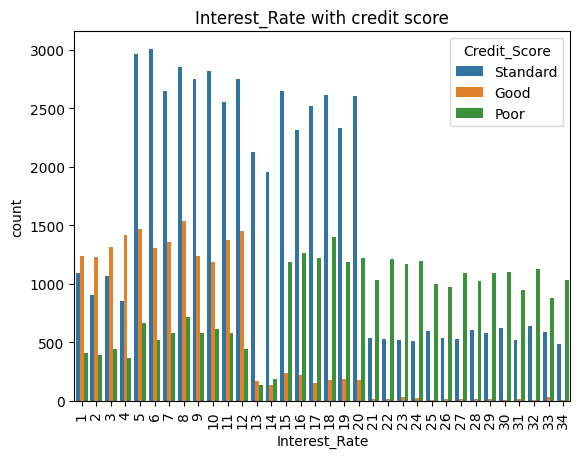

<Figure size 1000x600 with 0 Axes>

In [164]:
# Explore numerical variables
sns.countplot(data=data,x="Interest_Rate", hue="Credit_Score")
plt.xticks(x="Interest_Rate", rotation='vertical')
plt.title('Interest_Rate with credit score')
plt.figure(figsize=(10, 6))
plt.show()

**Interest rate upto 12 is good to get better credit score**

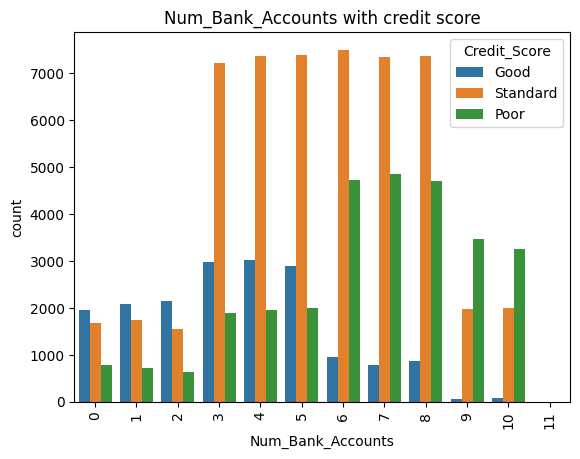

<Figure size 1000x600 with 0 Axes>

In [165]:
# Explore numerical variables
sns.countplot(data=data,x="Num_Bank_Accounts", hue="Credit_Score")
plt.xticks(x="Num_Bank_Accounts", rotation='vertical')
plt.title('Num_Bank_Accounts with credit score')
plt.figure(figsize=(10, 6))
plt.show()

**The customer having bank accounts upto 5 is good to get better credit score**

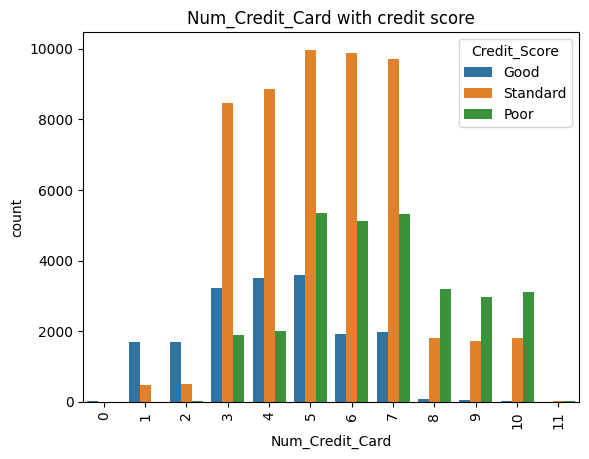

<Figure size 1000x600 with 0 Axes>

In [166]:
# Explore numerical variables
sns.countplot(data=data,x="Num_Credit_Card", hue="Credit_Score")
plt.xticks(x="Num_Credit_Card", rotation='vertical')
plt.title('Num_Credit_Card with credit score')
plt.figure(figsize=(10, 6))
plt.show()

**Customer having 3 to 5 credit card is good for getting better credit score.And customer having more credit cards doesn't mean that they get good credit score.**

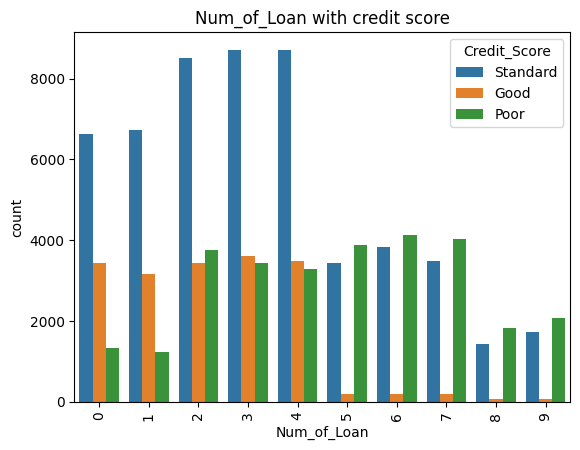

<Figure size 1000x600 with 0 Axes>

In [167]:
# Explore numerical variables
sns.countplot(data=data,x="Num_of_Loan", hue="Credit_Score")
plt.xticks(x="Num_of_Loan", rotation='vertical')
plt.title('Num_of_Loan with credit score')
plt.figure(figsize=(10, 6))
plt.show()

**Customer having number of loan upto 4 is good to get better credit score.Customer having more loan is not good to get better credit score**

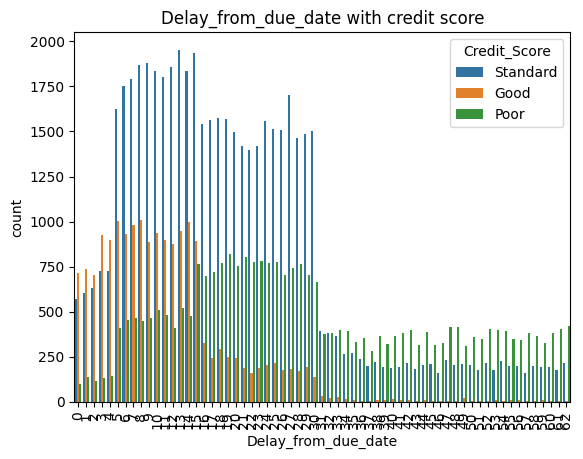

<Figure size 1500x500 with 0 Axes>

In [172]:
# Explore numerical variables
sns.countplot(data=data,x="Delay_from_due_date", hue="Credit_Score")
plt.xticks(x="Delay_from_due_date", rotation='vertical')
plt.title('Delay_from_due_date with credit score')
plt.figure(figsize=(15, 5))
plt.show()

**customer can delay  credit card payment 5 – 15 days from the due date. Delaying payments for more than 17 days from the due date will impact your credit scores negatively.**

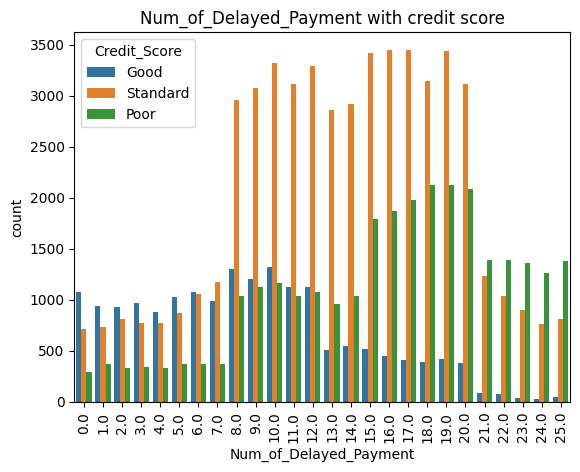

<Figure size 1000x600 with 0 Axes>

In [173]:
# Explore numerical variables
sns.countplot(data=data,x="Num_of_Delayed_Payment", hue="Credit_Score")
plt.xticks(x="Num_of_Delayed_Payment", rotation='vertical')
plt.title('Num_of_Delayed_Payment with credit score')
plt.figure(figsize=(10, 6))
plt.show()

**Number of delayed payemnts upto 12 will not effect the credit score badly.but there is a chance of getting poor credit score is high from delaying payments  for more than 8 days.**

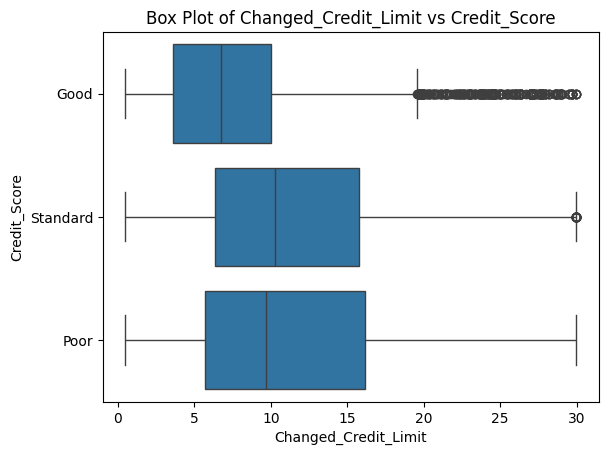

In [175]:
sns.boxplot(x=data['Changed_Credit_Limit'], y=data['Credit_Score'])
plt.xlabel('Changed_Credit_Limit')
plt.ylabel('Credit_Score')
plt.title('Box Plot of Changed_Credit_Limit vs Credit_Score')
plt.show()

**A Changed Credit Limit of 3 to
 6 is favorable to your credit scores. But having changed credit limit of above  6 is not favorable.**

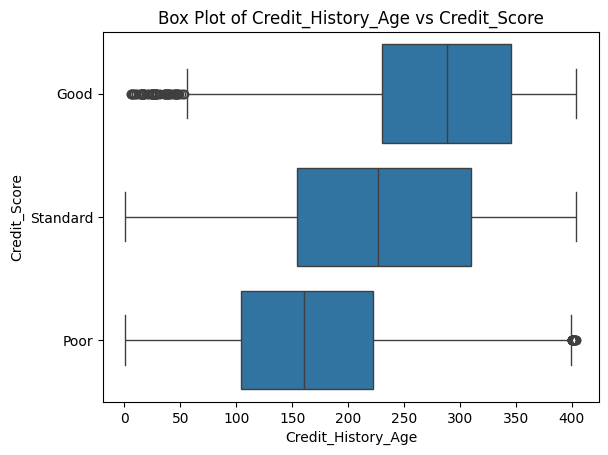

In [176]:
sns.boxplot(x=data['Credit_History_Age'], y=data['Credit_Score'])
plt.xlabel('Credit_History_Age')
plt.ylabel('Credit_Score')
plt.title('Box Plot of Credit_History_Age vs Credit_Score')
plt.show()

**The customer who have 'large credit history age' is good to get better credit score**

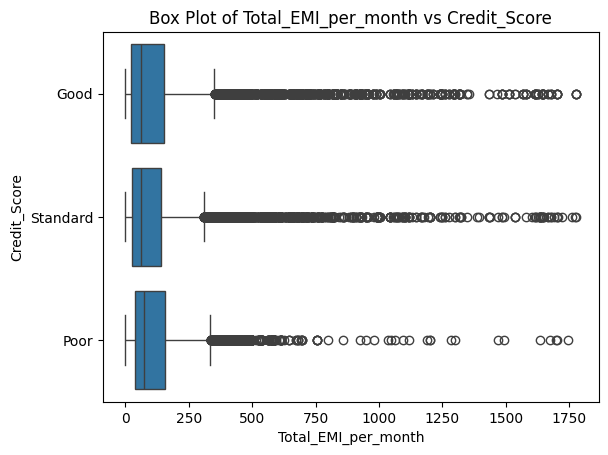

In [177]:
sns.boxplot(x=data['Total_EMI_per_month'], y=data['Credit_Score'])
plt.xlabel('Total_EMI_per_month')
plt.ylabel('Credit_Score')
plt.title('Box Plot of Total_EMI_per_month vs Credit_Score')
plt.show()

**Total amount of EMI doesn't affect credit score**

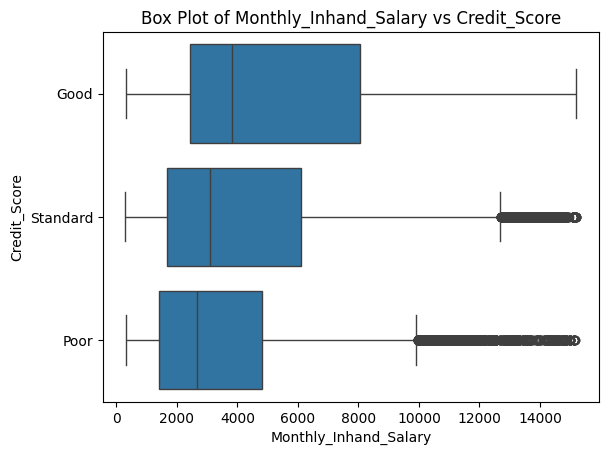

In [178]:
sns.boxplot(x=data['Monthly_Inhand_Salary'], y=data['Credit_Score'])
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Credit_Score')
plt.title('Box Plot of Monthly_Inhand_Salary vs Credit_Score')
plt.show()

**High monthly inhand salary is good to get better credit score**

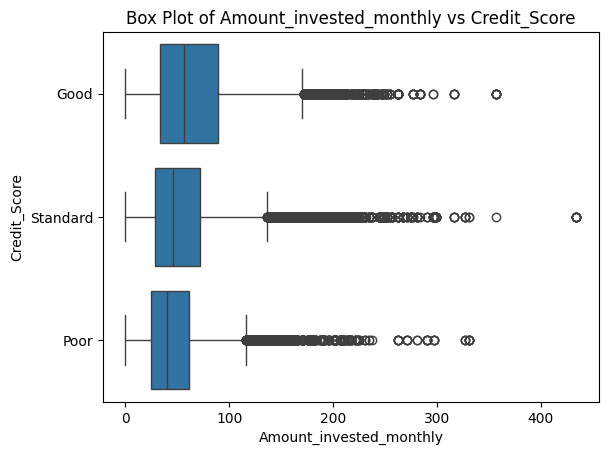

In [179]:
sns.boxplot(x=data['Amount_invested_monthly'], y=data['Credit_Score'])
plt.xlabel('Amount_invested_monthly')
plt.ylabel('Credit_Score')
plt.title('Box Plot of Amount_invested_monthly vs Credit_Score')
plt.show()

**Amount invested monthly doesn't affect credit score**

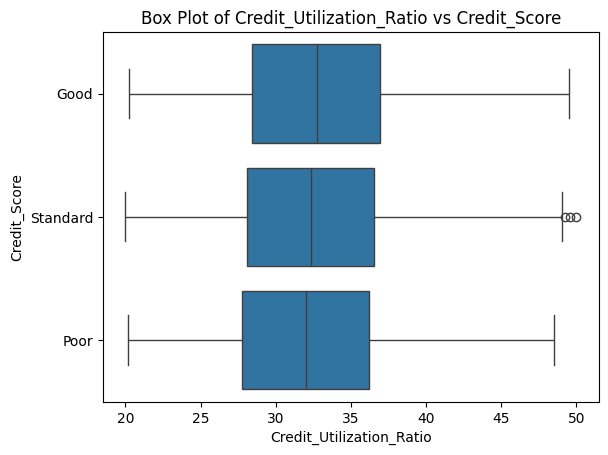

In [180]:
sns.boxplot(x=data['Credit_Utilization_Ratio'], y=data['Credit_Score'])
plt.xlabel('Credit_Utilization_Ratio')
plt.ylabel('Credit_Score')
plt.title('Box Plot of Credit_Utilization_Ratio vs Credit_Score')
plt.show()

**Credit utilization ratio doesn't affect credit score**


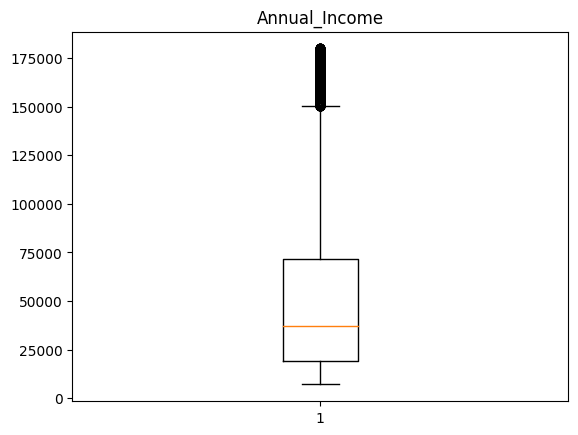

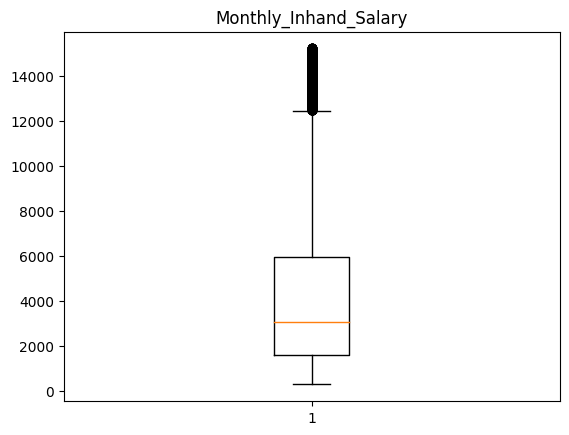

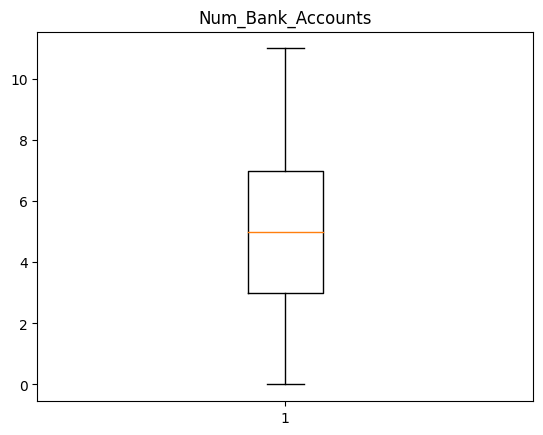

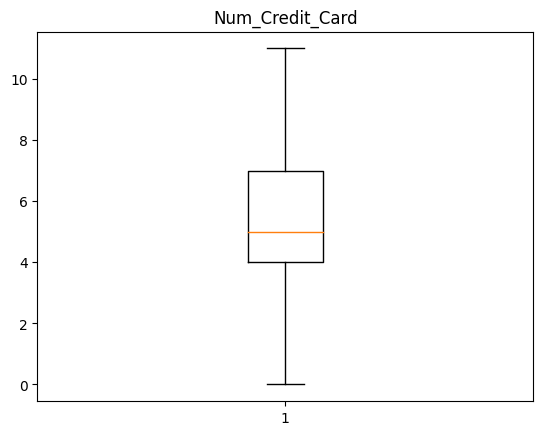

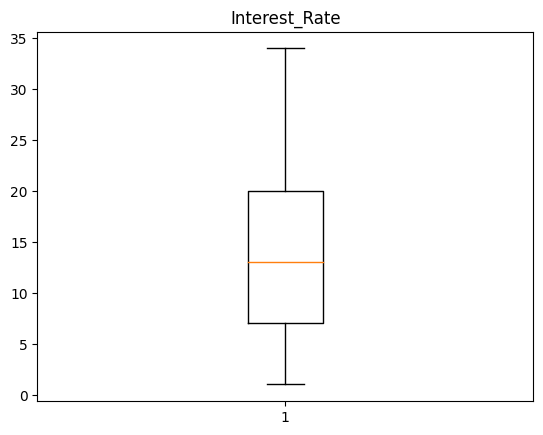

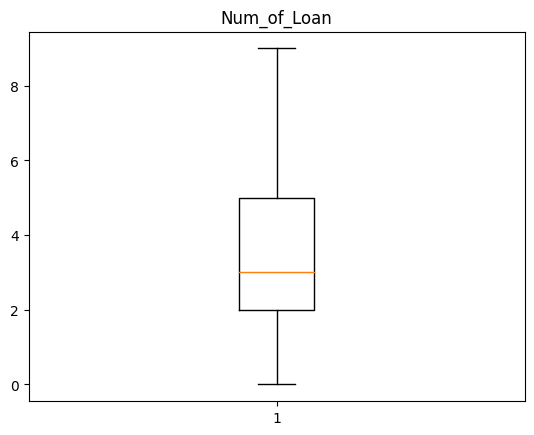

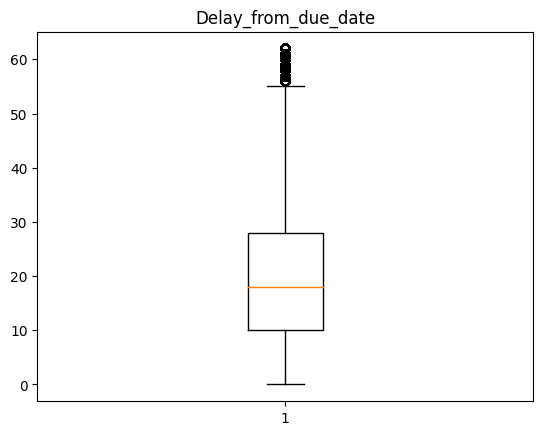

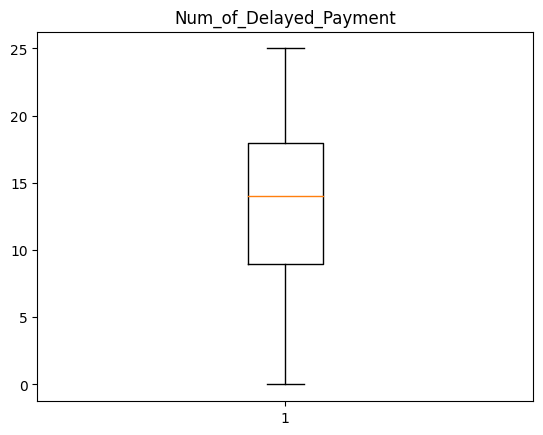

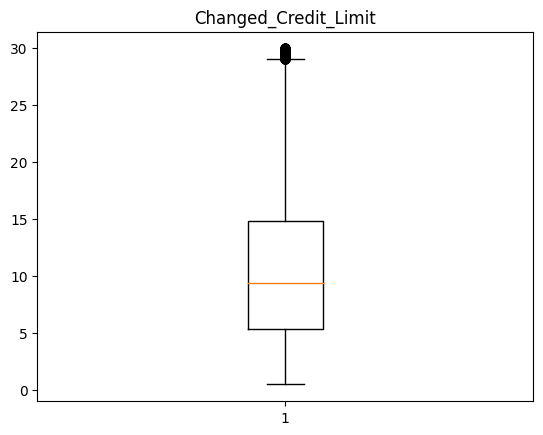

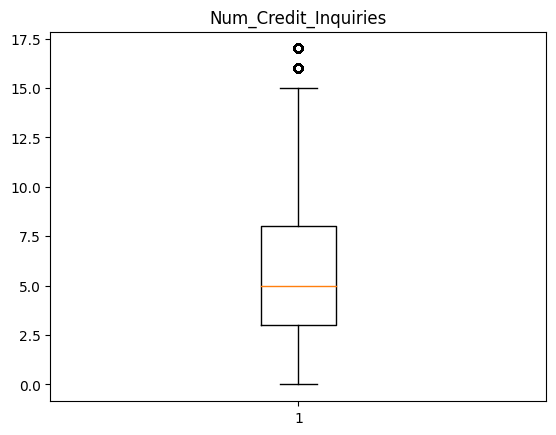

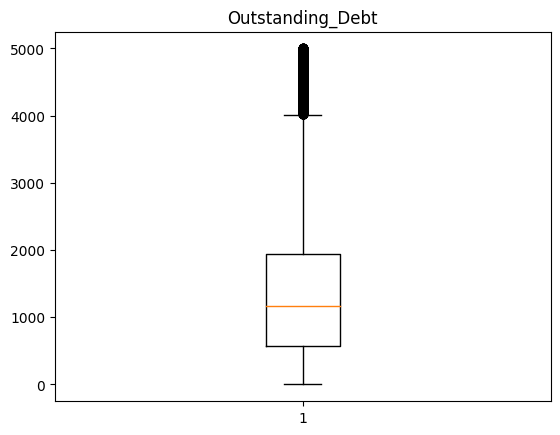

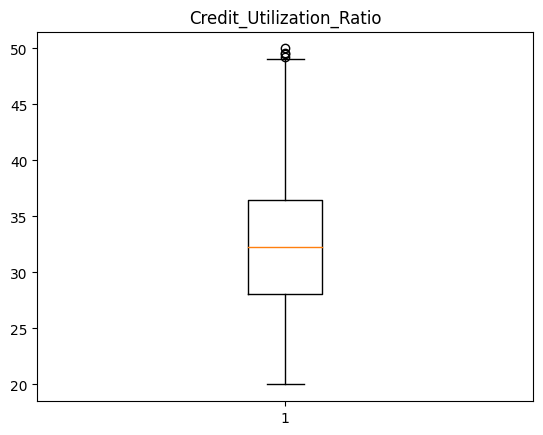

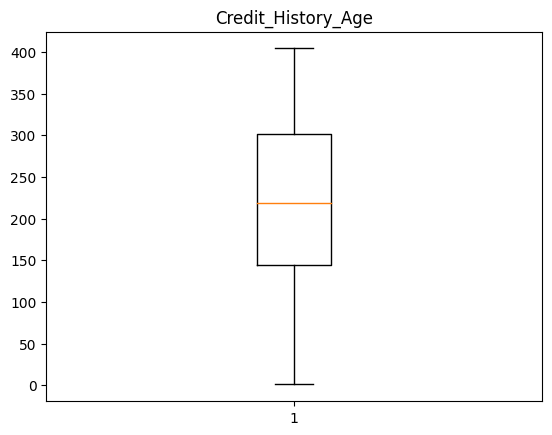

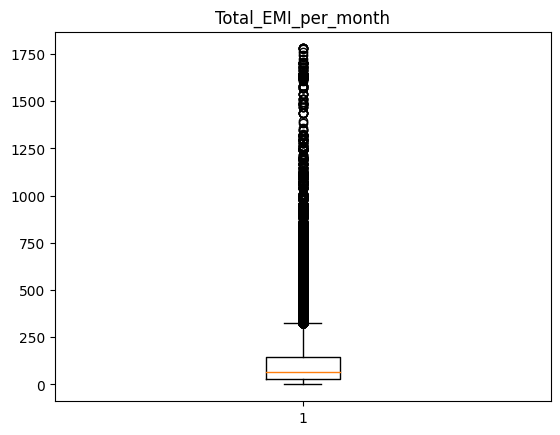

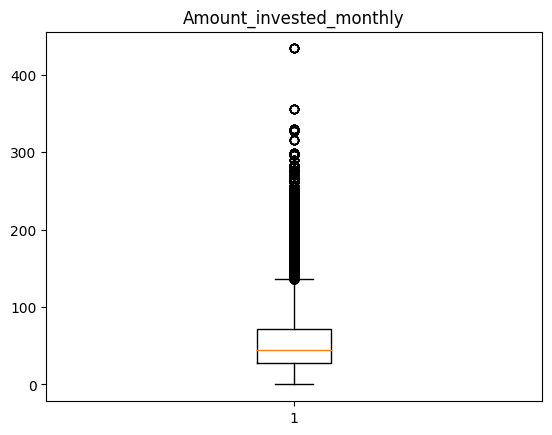

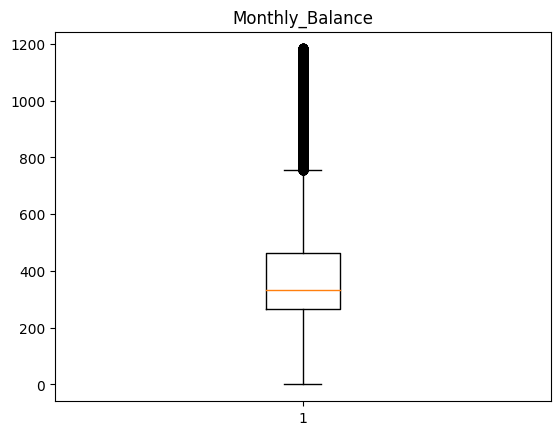

In [181]:
#outlier detection
num_cols=['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

**There are outliers in some featues,But no need to remove.Features are relevent in the dataset**

In [183]:
data.corr()

<ipython-input-183-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
ID,1.000000,1.235872e-03,5.291503e-05,0.003338,1.170712e-02,-5.356989e-03,-0.004792,0.004826,-0.001900,3.956573e-03,...,-0.004730,0.001859,0.008670,-0.002201,2.941249e-03,-0.005402,-0.005604,-0.009127,-4.044109e-03,0.000859
Customer_ID,0.001236,1.000000e+00,-6.660113e-17,-0.002172,5.769305e-03,1.076923e-02,0.010196,-0.001189,-0.004601,-4.712091e-03,...,0.004581,0.005163,0.000660,0.000352,4.381594e-03,-0.002174,-0.014822,0.023904,1.632440e-02,-0.000922
Month,0.000053,-6.660113e-17,1.000000e+00,0.016990,-1.557496e-16,1.530483e-17,-0.001819,0.000079,0.000090,6.790115e-18,...,0.000342,0.000115,-0.000671,0.139604,3.200578e-17,0.002440,0.022784,0.049716,-1.043065e-16,-0.002095
Age,0.003338,-2.172258e-03,1.698955e-02,1.000000,-8.410995e-03,9.152456e-02,0.090636,-0.190415,-0.148567,-2.175571e-01,...,-0.174119,-0.184264,-0.157254,-0.250960,-2.023741e-01,0.025492,0.234618,-0.047334,7.104515e-02,0.116098
SSN,0.011707,5.769305e-03,-1.557496e-16,-0.008411,1.000000e+00,-8.041949e-03,-0.008367,0.011651,-0.004961,4.774004e-03,...,0.010697,0.013787,0.019752,-0.006684,2.950511e-03,0.002653,-0.003572,-0.004696,-2.951901e-03,-0.002724
Annual_Income,-0.005357,1.076923e-02,1.530483e-17,0.091525,-8.041949e-03,1.000000e+00,0.998154,-0.284060,-0.217852,-3.023524e-01,...,-0.250105,-0.286297,-0.176353,-0.280242,-2.693193e-01,0.175930,0.272374,0.438106,8.062806e-01,0.625640
Monthly_Inhand_Salary,-0.004792,1.019558e-02,-1.818625e-03,0.090636,-8.367089e-03,9.981538e-01,1.000000,-0.283181,-0.216847,-3.018580e-01,...,-0.249438,-0.285360,-0.176187,-0.279736,-2.690445e-01,0.176092,0.271457,0.421836,8.073264e-01,0.626631
Num_Bank_Accounts,0.004826,-1.188701e-03,7.909795e-05,-0.190415,1.165117e-02,-2.840602e-01,-0.283181,1.000000,0.442694,5.843015e-01,...,0.560193,0.601842,0.333794,0.518323,5.070634e-01,-0.071783,-0.485331,0.050035,-2.278278e-01,-0.286709
Num_Credit_Card,-0.001900,-4.600690e-03,8.973261e-05,-0.148567,-4.960946e-03,-2.178520e-01,-0.216847,0.442694,1.000000,4.979115e-01,...,0.479762,0.423300,0.255495,0.459429,4.903760e-01,-0.055249,-0.417205,0.058853,-1.746004e-01,-0.231913
Interest_Rate,0.003957,-4.712091e-03,6.790115e-18,-0.217557,4.774004e-03,-3.023524e-01,-0.301858,0.584302,0.497912,1.000000e+00,...,0.589185,0.571457,0.370156,0.632562,6.294144e-01,-0.075700,-0.576230,0.071651,-2.424790e-01,-0.317919


<ipython-input-184-ac4a54ad3344>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

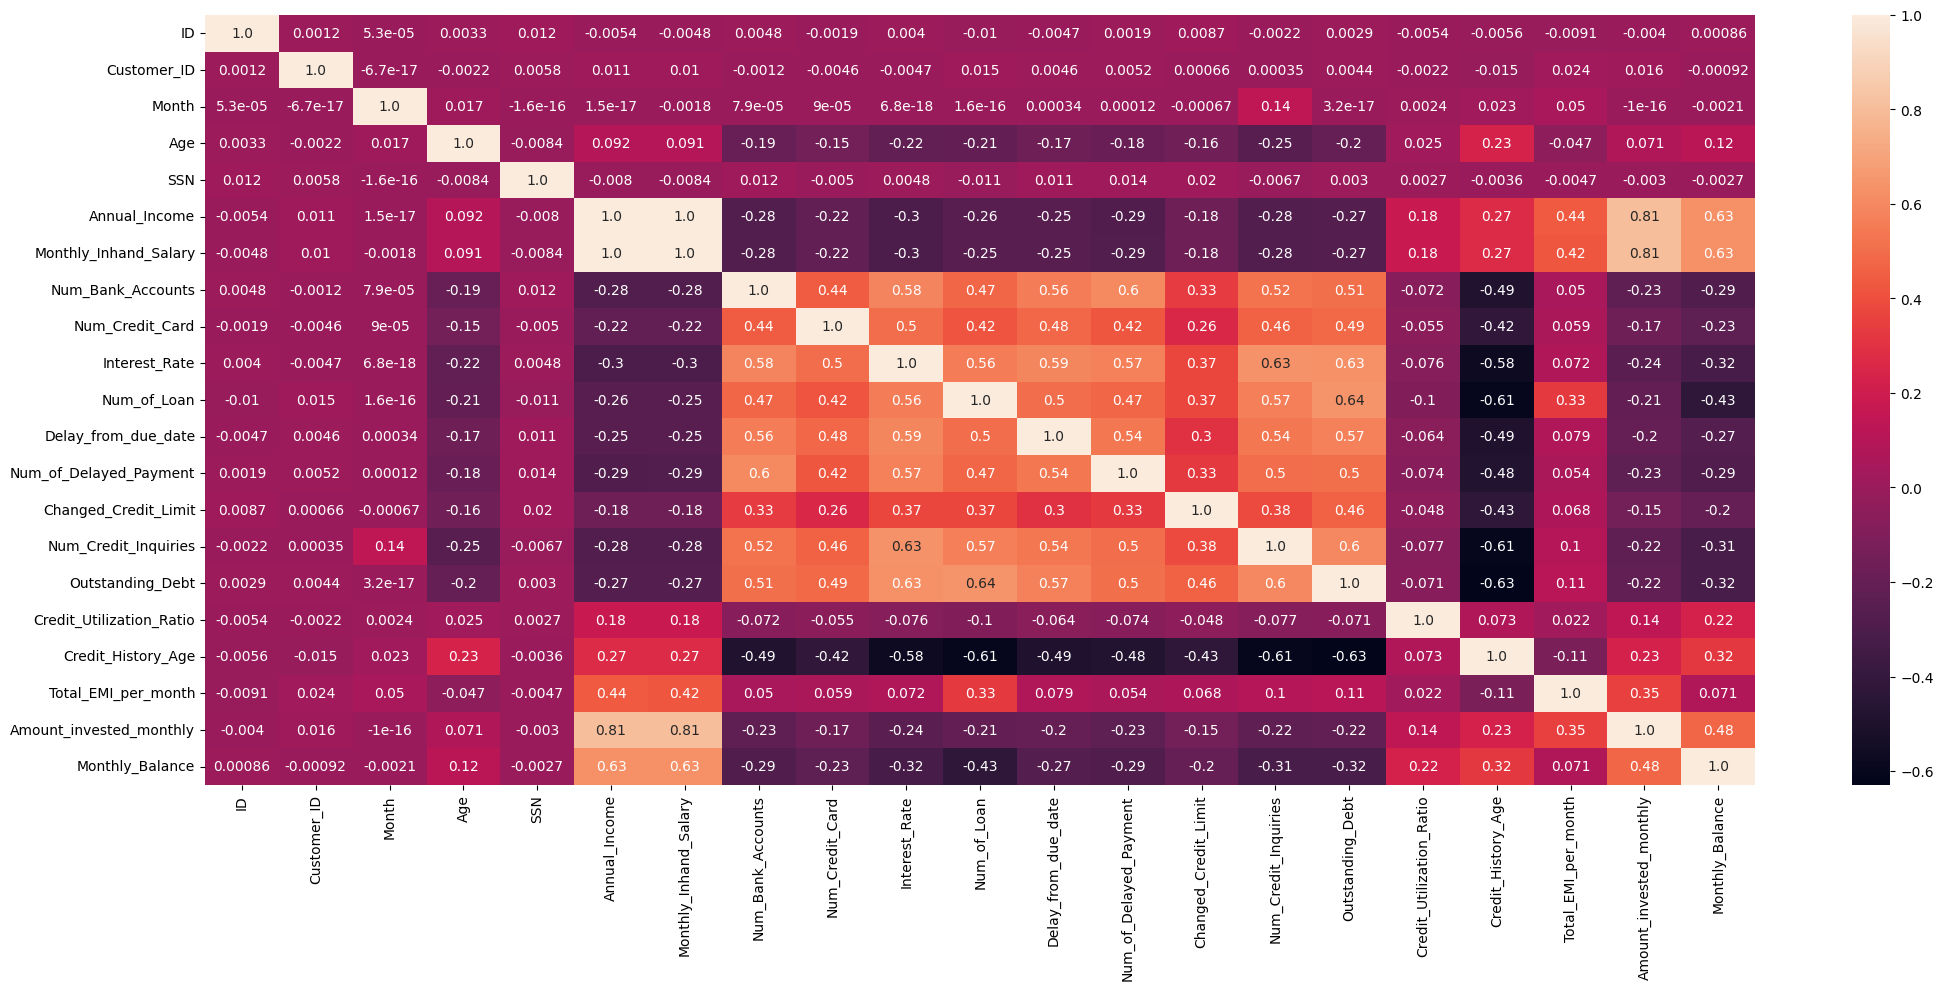

In [184]:
corr=data.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True,fmt='.2')

**After performing EDA and with the result of correlation Some irrelevant features like ID, Customer_ID,Month,SSN Type_of_loan, Amount_invested_monthy, Credit_Utilization_Ratio,Monthly_Inhand_Salary are dropped.**

In [185]:
#drop irrelevent features
data1 = data.drop(columns=['ID','Customer_ID','Name','Month','Type_of_Loan','SSN','Amount_invested_monthly','Monthly_Inhand_Salary','Credit_Utilization_Ratio'])

In [186]:
data1.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,3,7.0,11.27,4,Good,809.98,265,No,49.574949,High_spent_Small_value_payments,312.494089,Good
1,23,Scientist,19114.12,3,4,3,4,3,4.0,11.27,4,Good,809.98,266,No,49.574949,Low_spent_Large_value_payments,284.629162,Good
2,23,Scientist,19114.12,3,4,3,4,3,7.0,11.27,4,Good,809.98,267,No,49.574949,Low_spent_Medium_value_payments,331.209863,Good
3,23,Scientist,19114.12,3,4,3,4,5,4.0,6.27,4,Good,809.98,268,No,49.574949,Low_spent_Small_value_payments,223.451310,Good
4,23,Scientist,19114.12,3,4,3,4,6,4.0,11.27,4,Good,809.98,269,No,49.574949,High_spent_Medium_value_payments,341.489231,Good


In [187]:
data1.info()#information about the dataset after dropping some features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     100000 non-null  int64  
 1   Occupation              100000 non-null  object 
 2   Annual_Income           100000 non-null  float64
 3   Num_Bank_Accounts       100000 non-null  int64  
 4   Num_Credit_Card         100000 non-null  int64  
 5   Interest_Rate           100000 non-null  int64  
 6   Num_of_Loan             100000 non-null  int64  
 7   Delay_from_due_date     100000 non-null  int64  
 8   Num_of_Delayed_Payment  100000 non-null  float64
 9   Changed_Credit_Limit    100000 non-null  float64
 10  Num_Credit_Inquiries    100000 non-null  int64  
 11  Credit_Mix              100000 non-null  object 
 12  Outstanding_Debt        100000 non-null  float64
 13  Credit_History_Age      100000 non-null  int64  
 14  Payment_of_Min_Amount

##Encoding data

In [188]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data1['Credit_Score'] = le.fit_transform(data1['Credit_Score'])
data1['Occupation'] = le.fit_transform(data1['Occupation'])
data1['Payment_of_Min_Amount'] = le.fit_transform(data1['Payment_of_Min_Amount'])
data1['Credit_Mix'] = le.fit_transform(data1['Credit_Mix'])
data1['Payment_Behaviour'] = le.fit_transform(data1['Payment_Behaviour'])


In [189]:
data1['Occupation'].unique()

array([12, 13,  4,  5,  2,  7, 10,  3,  6,  8,  0, 11,  9, 14,  1])

In [190]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     100000 non-null  int64  
 1   Occupation              100000 non-null  int64  
 2   Annual_Income           100000 non-null  float64
 3   Num_Bank_Accounts       100000 non-null  int64  
 4   Num_Credit_Card         100000 non-null  int64  
 5   Interest_Rate           100000 non-null  int64  
 6   Num_of_Loan             100000 non-null  int64  
 7   Delay_from_due_date     100000 non-null  int64  
 8   Num_of_Delayed_Payment  100000 non-null  float64
 9   Changed_Credit_Limit    100000 non-null  float64
 10  Num_Credit_Inquiries    100000 non-null  int64  
 11  Credit_Mix              100000 non-null  int64  
 12  Outstanding_Debt        100000 non-null  float64
 13  Credit_History_Age      100000 non-null  int64  
 14  Payment_of_Min_Amount

In [191]:
data1.corr()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
Age,1.000000,-0.003966,0.091525,-0.190415,-0.148567,-0.217557,-0.213533,-0.174119,-0.184264,-0.157254,-0.250960,0.073380,-0.202374,0.234618,-0.162497,-0.047334,-0.033357,0.116098,-0.058923
Occupation,-0.003966,1.000000,0.001270,0.010430,0.003474,0.004501,-0.005038,0.007270,-0.006584,-0.002589,0.000549,0.006263,0.006455,-0.005178,-0.004319,0.000550,0.003785,-0.002208,0.005548
Annual_Income,0.091525,0.001270,1.000000,-0.284060,-0.217852,-0.302352,-0.255560,-0.250105,-0.286297,-0.176353,-0.280242,0.093991,-0.269319,0.272374,-0.194421,0.438106,-0.324406,0.625640,-0.080700
Num_Bank_Accounts,-0.190415,0.010430,-0.284060,1.000000,0.442694,0.584302,0.472483,0.560193,0.601842,0.333794,0.518323,-0.228723,0.507063,-0.485331,0.364265,0.050035,0.099795,-0.286709,0.177389
Num_Credit_Card,-0.148567,0.003474,-0.217852,0.442694,1.000000,0.497912,0.417960,0.479762,0.423300,0.255495,0.459429,-0.334318,0.490376,-0.417205,0.259624,0.058853,0.075279,-0.231913,0.113333
Interest_Rate,-0.217557,0.004501,-0.302352,0.584302,0.497912,1.000000,0.559156,0.589185,0.571457,0.370156,0.632562,-0.320808,0.629414,-0.576230,0.391145,0.071651,0.109068,-0.317919,0.121088
Num_of_Loan,-0.213533,-0.005038,-0.255560,0.472483,0.417960,0.559156,1.000000,0.501599,0.473919,0.374602,0.565087,-0.444663,0.638713,-0.605727,0.323988,0.328485,0.095428,-0.429416,0.064064
Delay_from_due_date,-0.174119,0.007270,-0.250105,0.560193,0.479762,0.589185,0.501599,1.000000,0.541627,0.296571,0.539919,-0.413935,0.572206,-0.491484,0.316006,0.078820,0.090029,-0.272273,0.097286
Num_of_Delayed_Payment,-0.184264,-0.006584,-0.286297,0.601842,0.423300,0.571457,0.473919,0.541627,1.000000,0.329311,0.499689,-0.246796,0.504019,-0.481965,0.370126,0.053653,0.098299,-0.286045,0.203116
Changed_Credit_Limit,-0.157254,-0.002589,-0.176353,0.333794,0.255495,0.370156,0.374602,0.296571,0.329311,1.000000,0.382673,-0.079143,0.463684,-0.429230,0.318439,0.068333,0.056723,-0.198706,0.190080


<Axes: >

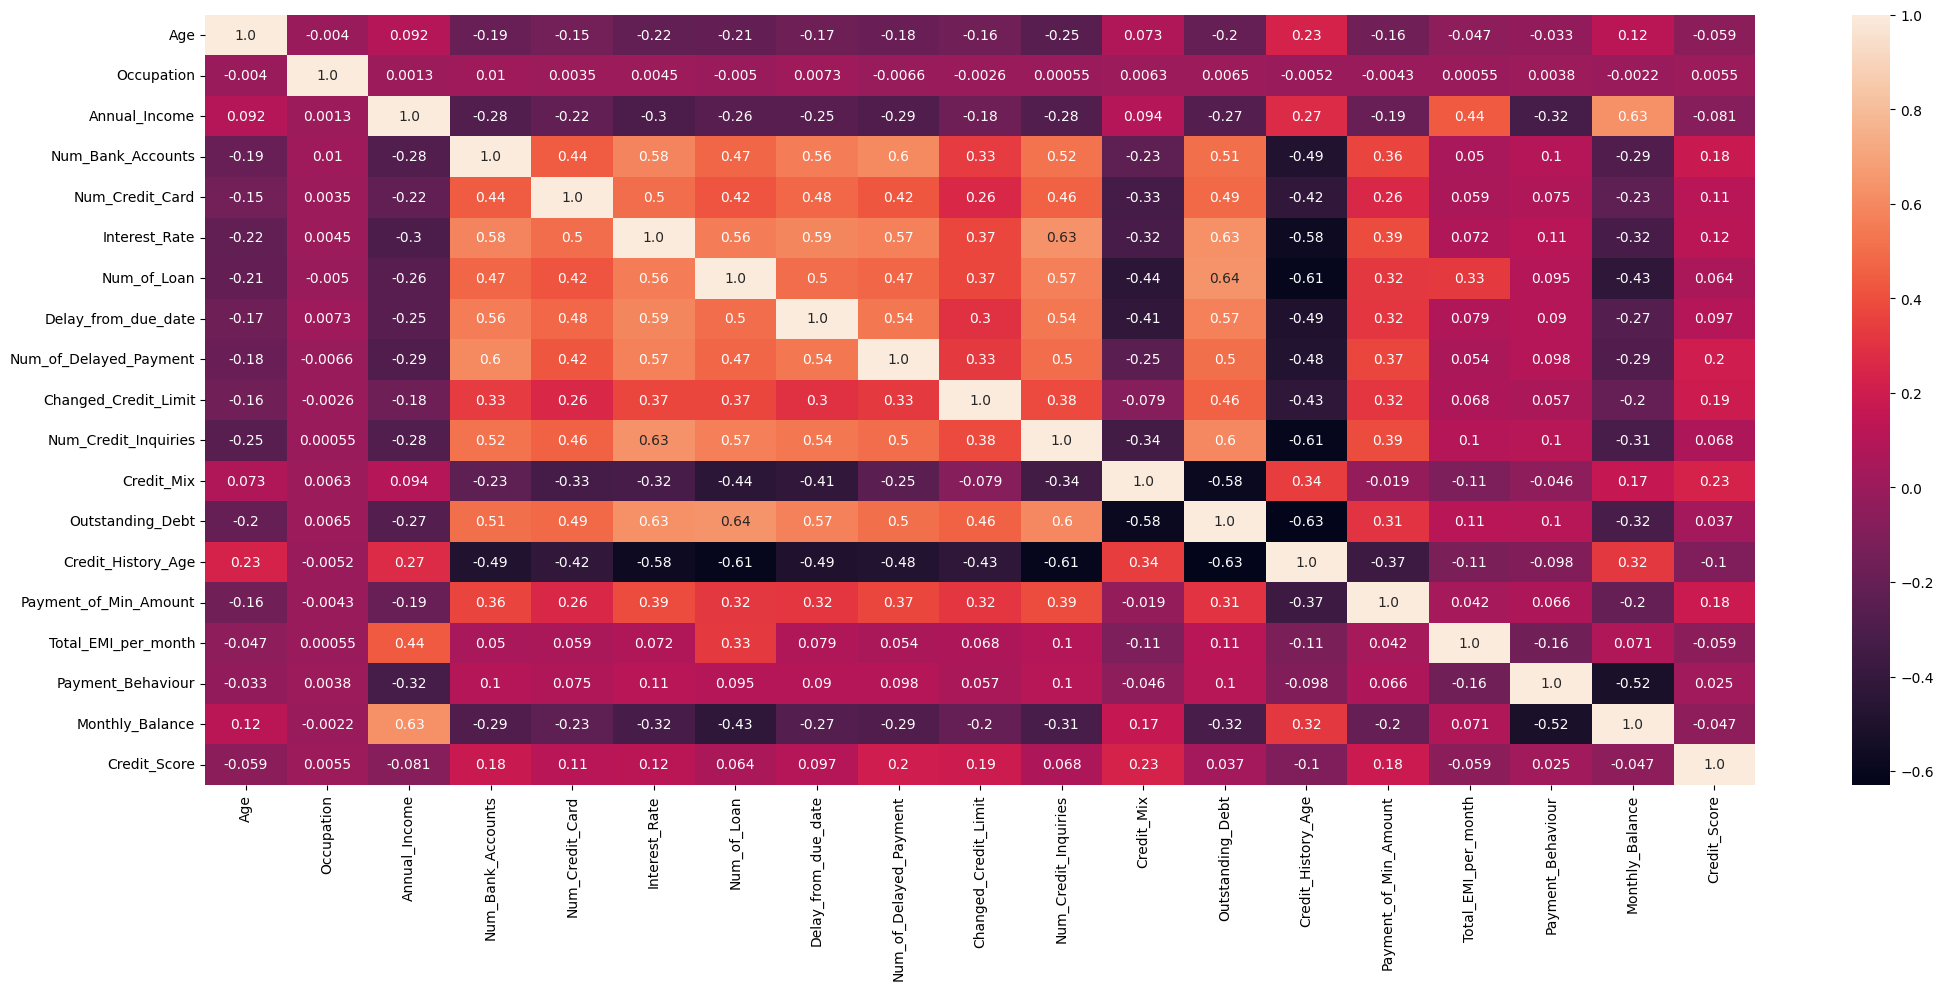

In [194]:
corr=data1.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True,fmt='.2')

In [195]:
# Split the data into features (X) and target variable (y)

X = data1.drop("Credit_Score",axis=1)
Y = pd.DataFrame(data1["Credit_Score"])
Y

,Credit_Score
0,0
1,0
2,0
3,0
4,0
...,...
99995,1
99996,1
99997,1
99998,2


##Sampling of data

In [196]:
from imblearn.over_sampling import SMOTE#importing necessary libraries to mitigate the imbalanced data.
sm = SMOTE(random_state=42)
X,Y = sm.fit_resample(X, Y)#over-sampling the data

0    53174
2    53174
1    53174
Name: Credit_Score, dtype: int64


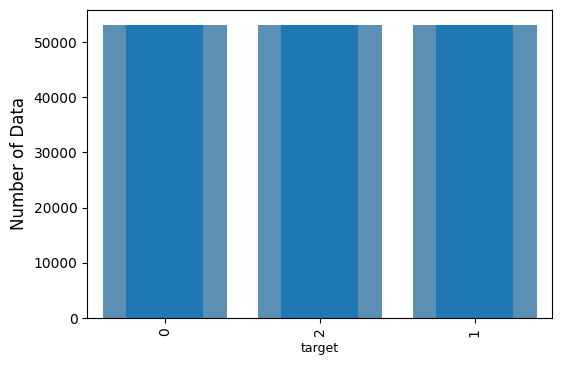

In [197]:
t = Y['Credit_Score'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(t.values,alpha=0.8)
t.plot.bar()
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
print(t)
plt.show()

##Scaling

In [198]:
from sklearn.preprocessing import MinMaxScaler#Perfrom MinMax Preprocessing
scaler = MinMaxScaler()

# Fit the scaler on the data and transform it
scaled_data = scaler.fit_transform(X)
scaled_data

array([[0.21428571, 0.85714286, 0.06999708, ..., 0.02786513, 0.4       ,
        0.26394144],
       [0.21428571, 0.85714286, 0.06999708, ..., 0.02786513, 0.6       ,
        0.24040535],
       [0.21428571, 0.85714286, 0.06999708, ..., 0.02786513, 0.8       ,
        0.27974971],
       ...,
       [0.19047619, 0.92857143, 0.00975851, ..., 0.01647488, 0.8       ,
        0.21967438],
       [0.45238095, 0.07142857, 0.01628097, ..., 0.02478143, 1.        ,
        0.23996882],
       [0.47619048, 0.35714286, 0.13516064, ..., 0.10888961, 0.2       ,
        0.17700804]])

In [199]:
from sklearn.model_selection import train_test_split#Divide the data into training, validation, and testing sets for model development.

Y= np.squeeze(Y)#squeeze() function is used to remove single-dimensional entries from the shape of an array.

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.25, random_state=42,)
#Spliting the data into training and test data in the ratio 75:25 respectively.
X_test_copy = X_test.copy()